# Changed TD-error

## Original TD-error

$ \delta_t = r_t + \gamma V(s_{t+1}) - V(s_t) $

Based on

$ G_t = \sum_t r_t $

## New TD-error

$ \delta_t = (1 + r_t)*(1  + \gamma V(s_{t+1})) - 1 - V(s_t) $

Based on

$ G_t = \prod_t (1 + r_t) - 1 $

In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/media/olle/DATA/Projects/orderbookrl


In [2]:
from orderbookrl.evaluate.collect_data import load_env_agent, run_through_all_data
import pandas as pd
%matplotlib inline

In [3]:
agent_id = 'PPO'
path = 'logs/tests/1/'
checkpoint = 396

env, agent = load_env_agent(agent_id, path, checkpoint)
result, trades, states, actions, rewards, quotes = run_through_all_data(env, agent)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:45675 to respond...


Using custom preprocessor mv


Waiting for redis server at 127.0.0.1:48349 to respond...
Starting local scheduler with the following resources: {'CPU': 8, 'GPU': 1}.

View the web UI at http://localhost:8889/notebooks/ray_ui71691.ipynb?token=4fd1008e62e8c6a8af43c4060f0288b9271277aaea240936



Created LogSyncer for /home/olle/ray_results/2018-08-30_14-06-3310gghc4c -> None
Using custom preprocessor mv


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



2018-03-24T17:15:02.085000Z
2018-03-25T01:04:50.077000Z
2018-03-25T12:14:39.651000Z
2018-03-25T19:45:14.965000Z
2018-03-26T03:40:30.086000Z
2018-03-26T13:11:24.734000Z
2018-03-26T19:12:16.448000Z
2018-03-26T22:17:50.287000Z
2018-03-27T02:39:12.875000Z
2018-03-27T09:16:24.135000Z
2018-03-27T17:44:25.619000Z
2018-03-28T01:34:59.996000Z
2018-03-28T11:25:12.808000Z
2018-03-28T22:00:38.690000Z
2018-03-29T06:03:42.938000Z
2018-03-29T11:17:15.249000Z
2018-03-29T15:48:45.785000Z
2018-03-29T21:40:42.128000Z
2018-03-30T00:35:29.223000Z
2018-03-30T04:00:53.422000Z
2018-03-30T07:29:09.418000Z
2018-03-30T11:34:02.133000Z
2018-03-30T15:20:38.646000Z
2018-03-30T19:15:34.281000Z
2018-03-31T00:59:36.524000Z
2018-03-31T07:28:12.644000Z
2018-03-31T13:32:00.972000Z
2018-03-31T21:24:16.806000Z
2018-04-01T07:12:27.782000Z
2018-04-01T14:19:03.854000Z
2018-04-01T18:11:07.161000Z
2018-04-02T00:40:48.556000Z
2018-04-02T08:31:53.580000Z
2018-04-02T17:09:25.718000Z
2018-04-03T02:59:58.746000Z
2018-04-03T10:04:30.

findfont: Found a missing font file.  Rebuilding cache.
font search path ['/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
generated new fontManager


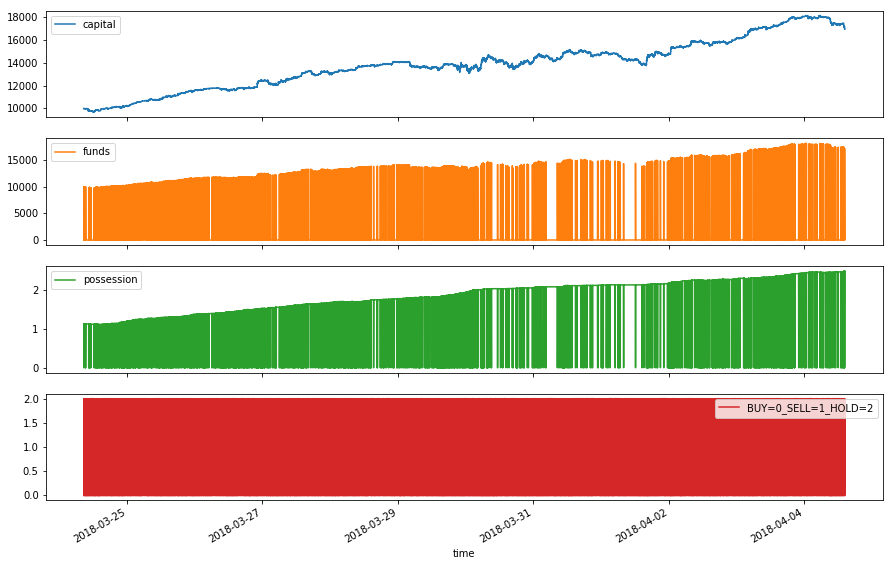

In [4]:
actions.columns = ['BUY=0_SELL=1_HOLD=2']
result.join(actions).plot(subplots=True, figsize=(15,10));

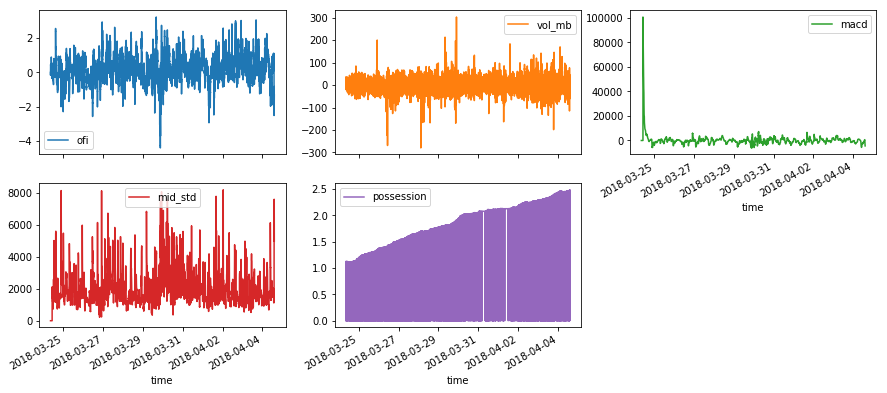

In [5]:
n_cols = 3
layout = (n_cols, 1+ int( (1+states.shape[1])/n_cols))
states.columns = ['ofi', 'vol_mb', 'macd', 'mid_std', 'possession']
states.plot(subplots=True, figsize=(15,10), layout=layout);

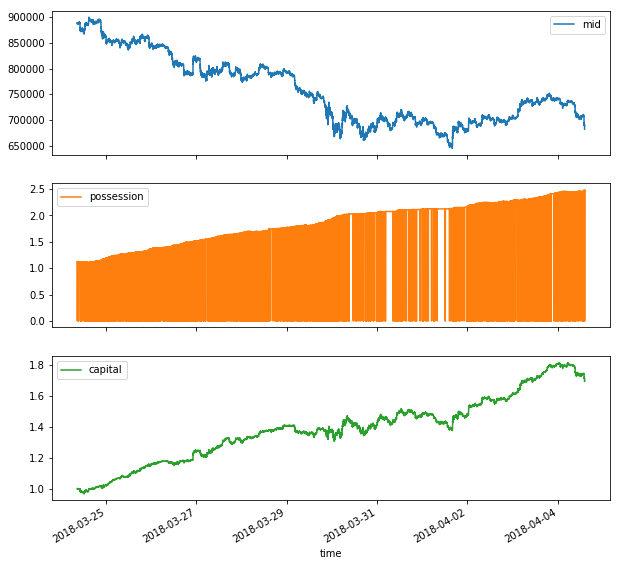

In [6]:
mid = (quotes['ask'] + quotes['bid'])/2
mid.name = 'mid'
temp = mid.to_frame().join(result.possession)
temp = temp.join(result.capital/result.capital[0])
temp.plot(subplots=True, figsize=(10,10));

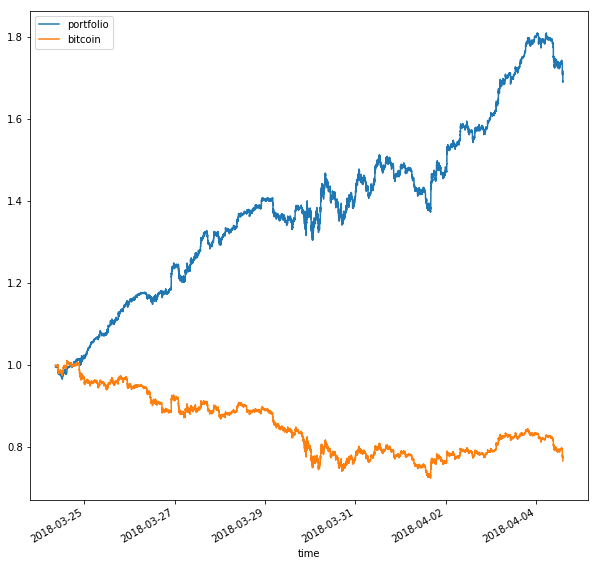

In [7]:
port_returns = result.capital.pct_change().iloc[1:]
port_cum_ret = (1+ port_returns).cumprod()
port_cum_ret.name = 'portfolio'
cum_returns = (1 + mid.pct_change().iloc[1:]).cumprod()
cum_returns.name = 'bitcoin'
temp = pd.concat([port_cum_ret, cum_returns], axis=1)
temp.plot(figsize=(10,10));

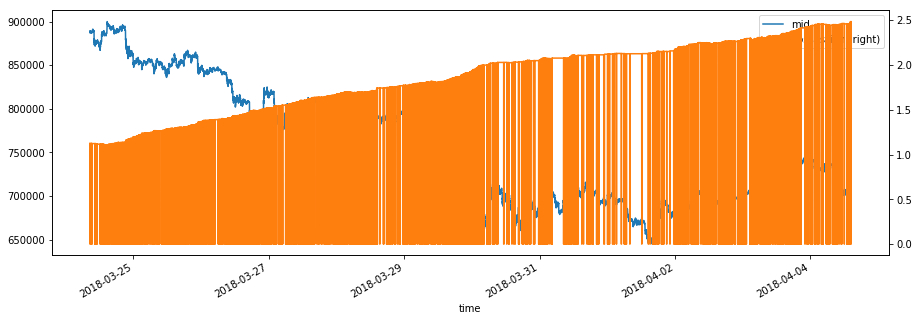

In [8]:
temp = mid.to_frame().join(result.possession)
temp.plot(secondary_y='possession', figsize=(15, 5));

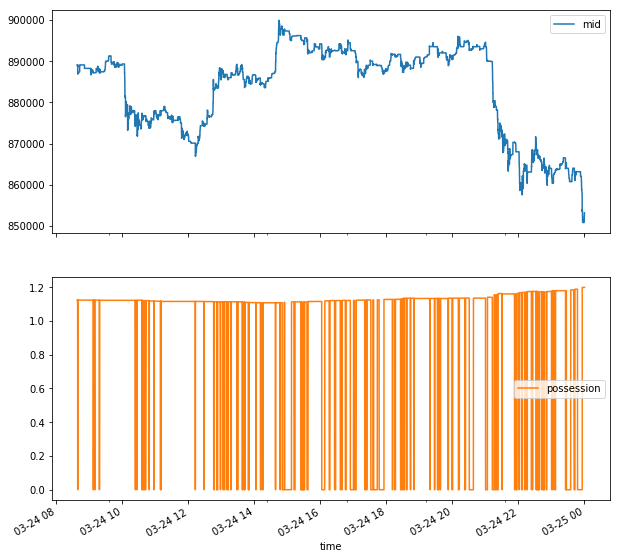

In [9]:
temp['2018-03-24'].plot(subplots=True, figsize=(10,10));